In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import pingouin as pg

raw = pd.read_csv('https://raw.githubusercontent.com/ethanweed/OpenSesame/master/Response_time_timing/mini-experiments.csv')

In [8]:
list(raw)

['acc',
 'accuracy',
 'average_response_time',
 'avg_rt',
 'background',
 'bidi',
 'browser_codename',
 'browser_name',
 'browser_version',
 'canvas_backend',
 'category',
 'clock_backend',
 'color',
 'color_backend',
 'compensation',
 'condition',
 'coordinates',
 'correct',
 'correct_keyboard_response_1',
 'correct_response',
 'count_WM_load',
 'count_WM_sequence',
 'count_WM_trials_loop',
 'count_WM_trials_sequence',
 'count_block_loop',
 'count_block_sequence',
 'count_color_choice',
 'count_color_choice_multi',
 'count_color_choice_multi_sequence',
 'count_color_multi_loop',
 'count_color_multi_sequence',
 'count_color_target_1',
 'count_color_target_1_1',
 'count_color_word_id',
 'count_color_word_id_sequence',
 'count_color_word_id_trial_loop',
 'count_color_word_id_trial_sequence',
 'count_correct_1',
 'count_counterbalance_javascript',
 'count_experiment',
 'count_feedback',
 'count_feedback_1',
 'count_feedback_1_1',
 'count_fixation',
 'count_fixation_1',
 'count_fixation_co

In [9]:
#response_time
#accuracy
#id
#condition

In [14]:
df = pd.DataFrame({'rt': raw['response_time'],
                  'correct': raw['correct'],
                  'id': raw['jatosStudyResultId'],
                  'condition': raw['condition']})
df

,rt,correct,id,condition
0,237,1,967,pure_rt
1,244,1,967,pure_rt
2,274,1,967,pure_rt
3,220,1,967,pure_rt
4,368,1,967,pure_rt
...,...,...,...,...
2473,1092,0,945,WM
2474,502,1,945,WM
2475,715,0,945,WM
2476,1104,1,945,WM


In [15]:
set(df['condition'])

{'WM', 'color_1/4', 'color_words', 'food_tools', 'letter_vs_number', 'pure_rt'}

In [16]:
# make a figure showing the response time for all the conditions

<AxesSubplot:xlabel='rt', ylabel='condition'>

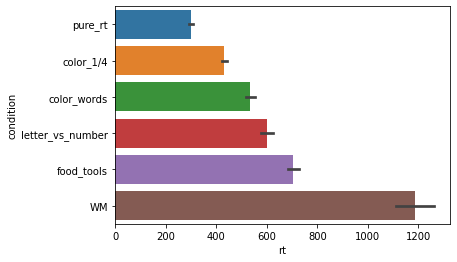

In [19]:
sns.barplot(data = df, x = 'rt', y = 'condition')

<AxesSubplot:xlabel='condition', ylabel='rt'>

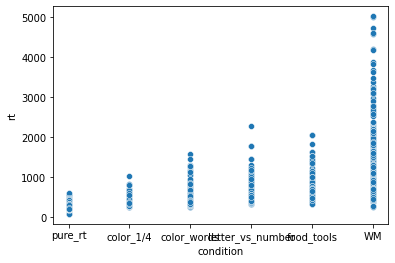

In [20]:
sns.scatterplot(data = df, x = 'condition', y = 'rt')

(0.0, 1000.0)

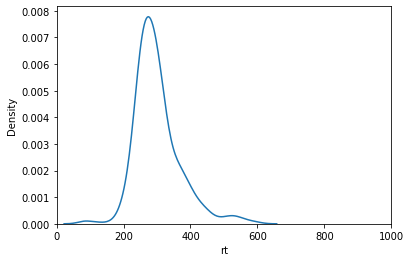

In [23]:
pure = df.loc[df['condition'] == 'pure_rt']
ax = sns.kdeplot(data = pure, x = 'rt')
ax.set_xlim(0,1000)

In [ ]:
data = df.loc[() | ()]

In [24]:
data = df.loc[(df['condition'] == 'pure_rt')|(df['condition'] == 'color_1/4')]

(0.0, 1000.0)

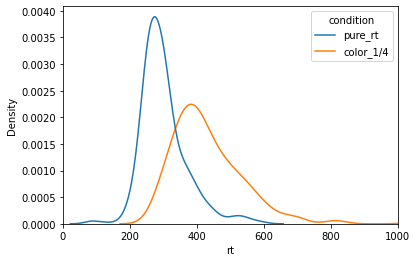

In [25]:
ax = sns.kdeplot(data = data, x = 'rt', hue = 'condition')
ax.set_xlim(0,1000)

In [29]:
pure_rt = df.loc[df['condition'] == 'pure_rt']['rt']
binary_choice = df.loc[df['condition'] == 'color_1/4']['rt']

pg.ttest(pure_rt, binary_choice, paired = True).round(4)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-24.667,419,two-sided,0.0,"[-140.52, -119.78]",1.4737,9.064e+79,1.0


In [30]:
df_means = df.groupby(['id', 'condition']).mean().reset_index()
pure_rt = df_means.loc[df_means['condition'] == 'pure_rt']['rt']
binary_choice = df_means.loc[df_means['condition'] == 'color_1/4']['rt']

pg.ttest(binary_choice,pure_rt, paired = True).round(4)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,14.2525,20,two-sided,0.0,"[111.1, 149.2]",2.5394,1.28e+09,1.0
